In [57]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from functools import partial
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2
from matplotlib import pyplot
import numpy as np
import plotly.express as px
project_path = 'D:\esperimenti\programming_database\houses_price'
data = pd.read_csv(project_path+'\data\\train.csv')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [58]:
nan_features = data.isnull().sum().where(data.isnull().sum() != 0 ).dropna()
sale_corr = data.corr()['SalePrice'].sort_values()

#get only features where corr > 0.5 and interesting features for a possible buyer
top_sale_corr = sale_corr.sort_values().where(sale_corr > 0.45).dropna()
top_sale_corr_indexes = top_sale_corr.index
top_sale_corr_indexes = top_sale_corr_indexes.append(pd.Index(["MSZoning"]))

#Create new dataset and check that NaN values are not present (Drop Column 'GarageYrBlt' and delete rows where 'MasVnrArea' equals to Nan  )
new_data = data[top_sale_corr_indexes]
new_data = new_data.drop("GarageYrBlt", axis=1)
new_data = new_data.drop("MasVnrArea",axis=1)
new_data = new_data.drop("YearRemodAdd",axis=1)
new_data
#new_data.dropna(subset = ["MasVnrArea"], inplace=True)
#top_sale_corr

,Fireplaces,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice,MSZoning
0,0,2003,8,2,856,856,548,2,1710,7,208500,RL
1,1,1976,6,2,1262,1262,460,2,1262,6,181500,RL
2,1,2001,6,2,920,920,608,2,1786,7,223500,RL
3,1,1915,7,1,961,756,642,3,1717,7,140000,RL
4,1,2000,9,2,1145,1145,836,3,2198,8,250000,RL
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1999,7,2,953,953,460,2,1647,6,175000,RL
1456,2,1978,7,2,2073,1542,500,2,2073,6,210000,RL
1457,2,1941,9,2,1188,1152,252,1,2340,7,266500,RL
1458,0,1950,5,1,1078,1078,240,1,1078,5,142125,RL


In [59]:
#Test correlation after One-Hot-Encoding
ohe_data = pd.get_dummies(data)
ohe_data_corr = ohe_data.corr()['SalePrice'].sort_values().where(sale_corr > 0.45).dropna()

In [60]:
#Test correlation after label-encoding
label_encoder = LabelEncoder()
data_encoded = data.copy()
for f in data:
    if(data[f].dtypes == 'object'):
        data_encoded[f] = label_encoder.fit_transform(data[f].values)
#data_out = label_encoder.fit_transform(data.values)
#data.values
sale_corr_enc = data_encoded.corr()['SalePrice'].sort_values().where(sale_corr > 0.45).dropna()
sale_corr_enc


Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

      LotArea
0        8450
1        9600
2       11250
3        9550
4       14260
...       ...
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937

[1121 rows x 1 columns]


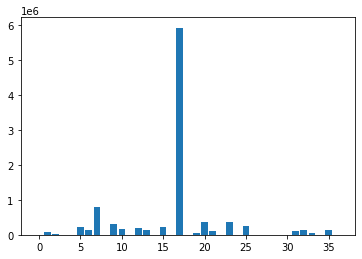

In [61]:
#Test for features selection by chi2 funbction (for categorical features)
ohe_data = ohe_data.dropna()
x1  = ohe_data.drop("SalePrice",axis=1).dropna()
y1 = ohe_data["SalePrice"]
total_corr = sale_corr.sort_values().dropna()
totale = data[total_corr.index].dropna()
x  = totale.drop("SalePrice",axis=1)
y = totale["SalePrice"]

fs = SelectKBest(score_func=chi2, k=1)
fs.fit(x, y)
cols = fs.get_support(indices=True)
features_df_new = x.iloc[:,cols]
print(features_df_new)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()



In [62]:
#Test for features selection by chi2 funbction (for categorical features)
ohe_data = ohe_data.dropna()
X1 = ohe_data.drop("SalePrice", axis=1).dropna()
y2 = ohe_data["SalePrice"]
X = data.drop("SalePrice",axis=1).dropna()
y = data["SalePrice"]
print(data.drop("SalePrice", axis=1).dropna())
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fs = SelectKBest(score_func=chi2, k=10)
# fs.fit(X, y)
# cols = fs.get_support(indices=True)
# features_df_new = X_train.iloc[:,cols]
# print(features_df_new)
# X_train_fs = fs.transform(X_train)
# X_test_fs = fs.transform(X_test)


# # what are scores for the features
# # for i in range(len(fs.scores_)):
# 	# print('Feature %d: %f' % (i, fs.scores_[i]))
# print(fs)
# print(len(fs.scores_))
# sc_filter = (lambda x : x == x)
# new_scores = fs.scores_[sc_filter(fs.scores_)]
# top_filter = new_scores >112655
# top_filter_index = []
# new_scores[top_filter]
# for el in range(0,len(top_filter)):
# 	if(top_filter[el] == True): 
# 		top_filter_index.append(el)
# 		#print(X_train.iloc[:,el])
# print(top_filter_index)
# np.sort(new_scores)[len(new_scores)-11: len(new_scores)-1]
# new_scores = fs.scores_[~np.isnan(fs.scores_)]
# print(len(new_scores))
# print(new_scores[len(new_scores)-2])
# filter(lambda v: v==v, new_scores)
# new_scores
# for i in range(len(fs.scores_)):
# 	if(fs.scores_[i] > 112655) : print('Feature %d: %f' % (i, fs.scores_[i]))



# plot the scores
# pyplot.bar([i for i in range(len(new_scores[top_filter]))], new_scores[top_filter])
# pyplot.show()

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]


In [63]:
#Graph number of house per year and average price
houses_per_year = new_data.groupby("YearBuilt").count()["SalePrice"]
houses_per_year.rename("Total houses built", inplace=True)
median_sale_price = new_data[["YearBuilt","SalePrice"]].groupby("YearBuilt").median('SalePrice').sort_values(by="YearBuilt")

fig = px.line(
    y=median_sale_price["SalePrice"].div(10000).tolist(), 
    x=median_sale_price.index,
    color=px.Constant("Median Price (x 10k)"),
    labels=dict(x="Year", y="Median Price (x 10k)", color="Time Period"),
    title="")
fig.add_bar(
    y=houses_per_year.values.tolist(), 
    x=median_sale_price.index,
    name="Nr. houses")

fig.show()

In [64]:
#Number house per year and tipology of house

houses_per_year_type = new_data.groupby(["YearBuilt","MSZoning"]).count()
houses_per_year_type.reset_index(level=1, inplace=True)
houses_per_year_type.reset_index(level=0, inplace=True)
houses_per_year_type = houses_per_year_type[["YearBuilt","MSZoning","SalePrice"]].rename(columns={'SalePrice':"count"})
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['A'],'Agriculture')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['C (all)'],'Commercial')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['FV'],'Floating Village Residential')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['I'],'Industrial')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RH'],'Resid. High Density')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RL'],'Resid. Low Density')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RP'],'Resid. Low Density Park')
houses_per_year_type['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RM'],'Resid. Medium Density')

fig2 = px.bar(houses_per_year_type, 
    x="YearBuilt",
    y="count", 
    color="MSZoning", 
    title="Numero di case per zona ",
    labels={'count':'Numero Case','YearBuilt':'Anno construzione'})
fig2.show()


In [84]:
#Price distribution
price_per_year = new_data.groupby(["YearBuilt","MSZoning"]).sum("SalePrice")
price_per_year.reset_index(level=1, inplace=True)
price_per_year.reset_index(level=0, inplace=True)
price_per_year[["YearBuilt","MSZoning","SalePrice"]]
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['C (all)'],'Commercial')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['FV'],'Floating Village Residential')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['A'],'Agriculture')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['I'],'Industrial')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RH'],'Resid. High Density')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RL'],'Resid. Low Density')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RP'],'Resid. Low Density Park')
price_per_year['MSZoning'] = houses_per_year_type['MSZoning'].replace(['RM'],'Resid. Medium Density')

figP = px.bar(price_per_year, 
    x="YearBuilt",
    y="SalePrice", 
    color="MSZoning", 
    title="Numero di case per zona ",
    labels={'count':'Numero Case','YearBuilt':'Anno construzione'})
figP.show()

,YearBuilt,MSZoning,SalePrice
0,1872,RM,122000
1,1875,RL,94000
2,1880,RM,802479
3,1882,RM,168000
4,1885,RM,222500
...,...,...,...
193,2008,RL,6848530
194,2008,RM,392500
195,2009,FV,2100180
196,2009,RL,2745780


In [65]:
#Paramenters choice based an price correlazion
ohe_enc_data = pd.get_dummies(new_data)
corr_map = ohe_enc_data.corr().sort_values("SalePrice")["SalePrice"].reset_index(level=0).rename(columns={"index":"Feature"})

#print(new_data.info())
fig3 = px.bar(corr_map, x='Feature', y='SalePrice',
             hover_data=['SalePrice', 'Feature'], color='SalePrice')
fig3.show()


le = LabelEncoder()
data_le = new_data.copy()
for f in new_data:
    if(new_data[f].dtypes == 'object'):
        data_le[f] = le.fit_transform(new_data[f].values)

corr_map_le = data_le.corr().sort_values("SalePrice")["SalePrice"].reset_index(level=0).rename(columns={"index":"Feature"})
print(le.inverse_transform([0,1,2,3,4]))

#print(new_data.info())
fig3 = px.bar(corr_map_le, x='Feature', y='SalePrice',
             hover_data=['SalePrice', 'Feature'], color='SalePrice')
fig3.show()

['C (all)' 'FV' 'RH' 'RL' 'RM']


In [66]:
data_le.iloc[:,2]

0       8
1       6
2       6
3       7
4       9
       ..
1455    7
1456    7
1457    9
1458    5
1459    6
Name: TotRmsAbvGrd, Length: 1460, dtype: int64

In [67]:

fig4 = make_subplots(rows=4, cols=3,subplot_titles=("Fireplaces","YearBuilt","FullBath","TotRmsAbvGrd","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual","SalePrice","MSZoning" ))
cont = 0
for i in range (4):
    for j in range (3):
        fig4.add_trace(
            go.Scatter(x=data_le.iloc[:,cont], y=data_le["SalePrice"],mode="markers"),
            row=i+1, col=j+1
        )
        cont+=1

fig4.update_layout(height=1200, width=1100, title_text="Correlation scatter matrix")
fig4.show()
corr_map_le

,Feature,SalePrice
0,MSZoning,-0.166872
1,Fireplaces,0.466929
2,YearBuilt,0.522897
3,TotRmsAbvGrd,0.533723
4,FullBath,0.560664
5,1stFlrSF,0.605852
6,TotalBsmtSF,0.613581
7,GarageArea,0.623431
8,GarageCars,0.640409
9,GrLivArea,0.708624


In [68]:
#Setting up some model to test which one peforms better

sc = StandardScaler()
X_sc = sc.fit_transform(data_le.drop("SalePrice", axis=1))

x_final = X_sc
y_final = data_le["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=2)
print("Train:" ,x_train.shape)
print("Test;",x_test.shape)

def get_errors_performace(y_test, y_pred, model):
    MAE='{0:.2f}'.format(mean_absolute_error(y_test,y_pred)) 
    MSE='{0:.2f}'.format(mean_squared_error(y_test,y_pred))  
    RMSE='{0:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred)))  
    return pd.DataFrame({"Eval Param":["MAE","MSE","RMSE"],"Result":[MAE,MSE,RMSE]})

Train: (1168, 11)
Test; (292, 11)


In [69]:

modelRFC = RandomForestRegressor()
modelRFC.fit(x_train, y_train)
y_pred = modelRFC.predict(x_test)
scores = cross_val_score(estimator=modelRFC,
                                X=x_train,
                                y=y_train,
                                cv=5)
get_errors_performace(y_test,y_pred,"RandomForestRegressor")

# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

,Eval Param,Result
0,MAE,19137.98
1,MSE,698200441.57
2,RMSE,26423.48


In [74]:
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)
y_pred = modelLR.predict(x_test)
scores = cross_val_score(estimator=modelLR,
                                X=x_train,
                                y=y_train,
                                cv=5)
                                
get_errors_performace(y_test,y_pred,"LinearREegression")
print(x_test[0,:])

# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[ 2.15221636 -0.40631893 -0.31868327  0.78974052  1.65186828  1.0114364
  0.05155935  0.31172464  0.54356765  0.65147924 -0.04553194]


In [71]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(x_train, y_train)
y_pred = modelDTR.predict(x_test)
scores = cross_val_score(estimator=modelDTR,
                                X=x_train,
                                y=y_train,
                                cv=5)
                                
get_errors_performace(y_test,y_pred,"DecisionTreeRegressor")

,Eval Param,Result
0,MAE,26585.42
1,MSE,1618945962.81
2,RMSE,40236.13


In [72]:
new_data["MSZoning"].unique()


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)